In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import xlrd
import utm
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:\Users\Sahil\Omdena\Detecting and Mitigating Traffic Accidents\datasets\CrashData.csv')
df

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,latitude,C,A,B,K,O,On_Peop,Crash,Pedes,Run_Off
0,935394,K.A.S,046269م,41642.83333,2014,1,Friday,41642,0.833333,769211,3544201,0,0.0,0,0,1,0,1,0,NaN
1,1061774,K.A.S,A161838,41640.99514,2014,1,Wednesday,41640,0.995139,769034,3539271,0,0.0,0,0,1,0,1,0,NaN
2,1065134,K.A.S,A166712,41666.71806,2014,1,Monday,41666,0.718056,769785,3543412,1,0.0,0,0,0,1,1,0,NaN
3,907647,K.A.S,A17307,41640.63889,2014,1,Wednesday,41640,0.638889,767840,3538976,0,0.0,0,0,1,0,1,0,NaN
4,907697,K.A.S,A17363,41657.76111,2014,1,Saturday,41657,0.761111,769967,3539837,0,0.0,0,0,1,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,1794370,K.A.S,A726335,43221.65903,2018,5,Tuesday,43221,0.659028,769756,3543584,0,0.0,0,0,1,0,1,0,NaN
65531,1794372,K.A.S,A726337,43221.66181,2018,5,Tuesday,43221,0.661806,765342,3542782,0,0.0,0,0,1,0,1,0,NaN
65532,1794373,K.A.S,A726338,43221.66458,2018,5,Tuesday,43221,0.664583,770600,3542006,0,0.0,0,0,1,0,1,0,NaN
65533,1794374,K.A.S,A726340,43221.66736,2018,5,Tuesday,43221,0.667361,769919,3538980,0,0.0,0,0,1,0,1,0,NaN


In [3]:
df['Accident_Date'] = df['Accident_Date'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df.head()

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,latitude,C,A,B,K,O,On_Peop,Crash,Pedes,Run_Off
0,935394,K.A.S,046269م,2014-01-03 19:59:59.712,2014,1,Friday,41642,0.833333,769211,3544201,0,0.0,0,0,1,0,1,0,NaN
1,1061774,K.A.S,A161838,2014-01-01 23:53:00.096,2014,1,Wednesday,41640,0.995139,769034,3539271,0,0.0,0,0,1,0,1,0,NaN
2,1065134,K.A.S,A166712,2014-01-27 17:14:00.384,2014,1,Monday,41666,0.718056,769785,3543412,1,0.0,0,0,0,1,1,0,NaN
3,907647,K.A.S,A17307,2014-01-01 15:20:00.096,2014,1,Wednesday,41640,0.638889,767840,3538976,0,0.0,0,0,1,0,1,0,NaN
4,907697,K.A.S,A17363,2014-01-18 18:15:59.904,2014,1,Saturday,41657,0.761111,769967,3539837,0,0.0,0,0,1,0,1,0,NaN


In [4]:
df['DateOnly'] = df['Accident_Date'].dt.date
df.head()

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,...,C,A,B,K,O,On_Peop,Crash,Pedes,Run_Off,DateOnly
0,935394,K.A.S,046269م,2014-01-03 19:59:59.712,2014,1,Friday,41642,0.833333,769211,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-03
1,1061774,K.A.S,A161838,2014-01-01 23:53:00.096,2014,1,Wednesday,41640,0.995139,769034,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-01
2,1065134,K.A.S,A166712,2014-01-27 17:14:00.384,2014,1,Monday,41666,0.718056,769785,...,1,0.0,0,0,0,1,1,0,NaN,2014-01-27
3,907647,K.A.S,A17307,2014-01-01 15:20:00.096,2014,1,Wednesday,41640,0.638889,767840,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-01
4,907697,K.A.S,A17363,2014-01-18 18:15:59.904,2014,1,Saturday,41657,0.761111,769967,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-18


In [7]:
df.sort_values('DateOnly')
df

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,...,C,A,B,K,O,On_Peop,Crash,Pedes,Run_Off,DateOnly
0,935394,K.A.S,046269م,2014-01-03 19:59:59.712,2014,1,Friday,41642,0.833333,769211,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-03
1,1061774,K.A.S,A161838,2014-01-01 23:53:00.096,2014,1,Wednesday,41640,0.995139,769034,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-01
2,1065134,K.A.S,A166712,2014-01-27 17:14:00.384,2014,1,Monday,41666,0.718056,769785,...,1,0.0,0,0,0,1,1,0,NaN,2014-01-27
3,907647,K.A.S,A17307,2014-01-01 15:20:00.096,2014,1,Wednesday,41640,0.638889,767840,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-01
4,907697,K.A.S,A17363,2014-01-18 18:15:59.904,2014,1,Saturday,41657,0.761111,769967,...,0,0.0,0,0,1,0,1,0,NaN,2014-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,1794370,K.A.S,A726335,2018-05-01 15:49:00.192,2018,5,Tuesday,43221,0.659028,769756,...,0,0.0,0,0,1,0,1,0,NaN,2018-05-01
65531,1794372,K.A.S,A726337,2018-05-01 15:53:00.384,2018,5,Tuesday,43221,0.661806,765342,...,0,0.0,0,0,1,0,1,0,NaN,2018-05-01
65532,1794373,K.A.S,A726338,2018-05-01 15:56:59.712,2018,5,Tuesday,43221,0.664583,770600,...,0,0.0,0,0,1,0,1,0,NaN,2018-05-01
65533,1794374,K.A.S,A726340,2018-05-01 16:00:59.904,2018,5,Tuesday,43221,0.667361,769919,...,0,0.0,0,0,1,0,1,0,NaN,2018-05-01


In [8]:
df['DateOnly']

0        2014-01-03
1        2014-01-01
2        2014-01-27
3        2014-01-01
4        2014-01-18
            ...    
65530    2018-05-01
65531    2018-05-01
65532    2018-05-01
65533    2018-05-01
65534    2018-05-01
Name: DateOnly, Length: 65535, dtype: object

In [5]:
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

In [5]:
def addHolidays(dataframe, dataframe_holiday):

    holiday_type = []

    for i in range(0, len(dataframe)):
        for j in range(0, len(dataframe_holiday)):
            if dataframe['DateOnly'][i] == dataframe_holiday['DateOnly'][j]:
                holiday_type.append(dataframe_holiday['Holiday_type'][j])
                break
            if j == len(dataframe_holiday) - 1:
                holiday_type.append('No holiday')
            
    return holiday_type
    

In [6]:
dfh = pd.read_csv(r'C:\Users\Sahil\Omdena\Detecting and Mitigating Traffic Accidents\datasets\Jordan_Holidays_2014_2018.csv', parse_dates = ['Date'])
dfh

,Date,Weekday,Holiday_name,Holiday_type
0,2014-01-01,Wednesday,New Year's Day,National holiday
1,2014-01-13,Monday,Prophet's Birthday,National holiday
2,2014-03-20,Thursday,March Equinox,Season
3,2014-04-13,Sunday,Palm Sunday,Optional Holiday
4,2014-04-18,Friday,Orthodox Good Friday,Observance
...,...,...,...,...
144,2018-09-23,Sunday,September Equinox,Season
145,2018-11-21,Wednesday,Prophet's Birthday,National holiday
146,2018-12-22,Saturday,December Solstice,Season
147,2018-12-25,Tuesday,Christmas Day,National holiday


In [40]:
def addHolidaysMain(dataframe, dataframe_holiday):
    dataframe_holiday['DateOnly'] = dataframe_holiday['Date'].dt.date
    dataframe_holiday['Year'] = dataframe_holiday['Date'].dt.year
    
    years = dataframe['Year'].unique()
    
    holiday_type = []
    
    for year in years:
        print(year)
        dataframe_year = dataframe[dataframe['Year'] == year]
        dataframe_year.reset_index(drop = False, inplace = True)
        
        dataframe_holiday_year = dataframe_holiday[dataframe_holiday['Year'] == year]
        dataframe_holiday_year.reset_index(drop = False, inplace = True)
        
        #holidays_added = addHolidays(dataframe_year, dataframe_holiday_year)
        #holidays.append(holidays_added)
        
        for i in range(0, len(dataframe_year)):
            for j in range(0, len(dataframe_holiday_year)):
                if dataframe_year['DateOnly'][i] == dataframe_holiday_year['DateOnly'][j]:
                    holiday_type.append(dataframe_holiday_year['Holiday_type'][j])
                    break
                if j == len(dataframe_holiday_year) - 1:
                    holiday_type.append('No holiday')
        
    

    #holidays_new = holidays.reshape(1, -1)
    #print(len(holiday_type))
    dataframe['HolidayType'] = holiday_type
    return dataframe
        
        
        
    
        
        
        
    
    

In [41]:
df_final = addHolidaysMain(df, dfh)

2014
2015
2016
2017
2018


In [42]:
df_final.head()

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,...,A,B,K,O,On_Peop,Crash,Pedes,Run_Off,DateOnly,HolidayType
0,935394,K.A.S,046269م,2014-01-03 19:59:59.712,2014,1,Friday,41642,0.833333,769211,...,0.0,0,0,1,0,1,0,NaN,2014-01-03,No holiday
1,1061774,K.A.S,A161838,2014-01-01 23:53:00.096,2014,1,Wednesday,41640,0.995139,769034,...,0.0,0,0,1,0,1,0,NaN,2014-01-01,National holiday
2,1065134,K.A.S,A166712,2014-01-27 17:14:00.384,2014,1,Monday,41666,0.718056,769785,...,0.0,0,0,0,1,1,0,NaN,2014-01-27,No holiday
3,907647,K.A.S,A17307,2014-01-01 15:20:00.096,2014,1,Wednesday,41640,0.638889,767840,...,0.0,0,0,1,0,1,0,NaN,2014-01-01,National holiday
4,907697,K.A.S,A17363,2014-01-18 18:15:59.904,2014,1,Saturday,41657,0.761111,769967,...,0.0,0,0,1,0,1,0,NaN,2014-01-18,No holiday


In [44]:
df_final.columns

Index(['Accident_ID', 'street', 'Accident_SerialNo', 'Accident_Date', 'Year',
       'Month', 'Day', 'Date ', 'Time ', 'Longitude', 'latitude', 'C', 'A',
       'B', 'K', 'O', 'On_Peop', 'Crash', 'Pedes', 'Run_Off', 'DateOnly',
       'HolidayType'],
      dtype='object')

In [46]:
df_final['TimeNew'] = df_final['Accident_Date'].dt.time
df_final.head()

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,...,B,K,O,On_Peop,Crash,Pedes,Run_Off,DateOnly,HolidayType,TimeNew
0,935394,K.A.S,046269م,2014-01-03 19:59:59.712,2014,1,Friday,41642,0.833333,769211,...,0,0,1,0,1,0,NaN,2014-01-03,No holiday,19:59:59.712000
1,1061774,K.A.S,A161838,2014-01-01 23:53:00.096,2014,1,Wednesday,41640,0.995139,769034,...,0,0,1,0,1,0,NaN,2014-01-01,National holiday,23:53:00.096000
2,1065134,K.A.S,A166712,2014-01-27 17:14:00.384,2014,1,Monday,41666,0.718056,769785,...,0,0,0,1,1,0,NaN,2014-01-27,No holiday,17:14:00.384000
3,907647,K.A.S,A17307,2014-01-01 15:20:00.096,2014,1,Wednesday,41640,0.638889,767840,...,0,0,1,0,1,0,NaN,2014-01-01,National holiday,15:20:00.096000
4,907697,K.A.S,A17363,2014-01-18 18:15:59.904,2014,1,Saturday,41657,0.761111,769967,...,0,0,1,0,1,0,NaN,2014-01-18,No holiday,18:15:59.904000


In [47]:
def getHour(timing):
    output = []
    for i in range(len(timing)):
        hour = timing[i].strftime("%H:%M:%S").split(":")[0]
        output.append(hour)
    return output

In [48]:
df_final['TimeHr'] = getHour(df_final['TimeNew'])
df_final.head()

,Accident_ID,street,Accident_SerialNo,Accident_Date,Year,Month,Day,Date,Time,Longitude,...,K,O,On_Peop,Crash,Pedes,Run_Off,DateOnly,HolidayType,TimeNew,TimeHr
0,935394,K.A.S,046269م,2014-01-03 19:59:59.712,2014,1,Friday,41642,0.833333,769211,...,0,1,0,1,0,NaN,2014-01-03,No holiday,19:59:59.712000,19
1,1061774,K.A.S,A161838,2014-01-01 23:53:00.096,2014,1,Wednesday,41640,0.995139,769034,...,0,1,0,1,0,NaN,2014-01-01,National holiday,23:53:00.096000,23
2,1065134,K.A.S,A166712,2014-01-27 17:14:00.384,2014,1,Monday,41666,0.718056,769785,...,0,0,1,1,0,NaN,2014-01-27,No holiday,17:14:00.384000,17
3,907647,K.A.S,A17307,2014-01-01 15:20:00.096,2014,1,Wednesday,41640,0.638889,767840,...,0,1,0,1,0,NaN,2014-01-01,National holiday,15:20:00.096000,15
4,907697,K.A.S,A17363,2014-01-18 18:15:59.904,2014,1,Saturday,41657,0.761111,769967,...,0,1,0,1,0,NaN,2014-01-18,No holiday,18:15:59.904000,18


In [50]:
df_final.drop(['Accident_Date', 'Time '], axis = 1, inplace = True)

In [51]:
def utm_to_latlon(dataframe, zone_number, zone_letter):
    easting = dataframe['Longitude']
    northing = dataframe['latitude']
    
    lat = utm.to_latlon(easting, northing, zone_number, zone_letter)[0]
    long = utm.to_latlon(easting, northing, zone_number, zone_letter)[1]
    
    return lat, long

In [54]:
df_final['lat'], df_final['long'] = utm_to_latlon(df_final, zone_number=36, zone_letter='R')
df_final.head()

,Accident_ID,street,Accident_SerialNo,Year,Month,Day,Date,Longitude,latitude,C,...,On_Peop,Crash,Pedes,Run_Off,DateOnly,HolidayType,TimeNew,TimeHr,lat,long
0,935394,K.A.S,046269م,2014,1,Friday,41642,769211,3544201,0,...,0,1,0,NaN,2014-01-03,No holiday,19:59:59.712000,19,32.001945,35.849682
1,1061774,K.A.S,A161838,2014,1,Wednesday,41640,769034,3539271,0,...,0,1,0,NaN,2014-01-01,National holiday,23:53:00.096000,23,31.957565,35.846437
2,1065134,K.A.S,A166712,2014,1,Monday,41666,769785,3543412,1,...,1,1,0,NaN,2014-01-27,No holiday,17:14:00.384000,17,31.994699,35.855531
3,907647,K.A.S,A17307,2014,1,Wednesday,41640,767840,3538976,0,...,0,1,0,NaN,2014-01-01,National holiday,15:20:00.096000,15,31.955189,35.833736
4,907697,K.A.S,A17363,2014,1,Saturday,41657,769967,3539837,0,...,0,1,0,NaN,2014-01-18,No holiday,18:15:59.904000,18,31.962443,35.856456


In [56]:
df_final.drop(['Date ', 'Longitude', 'latitude'], axis = 1, inplace = True)

In [67]:
df_final.to_csv('CrashData_cleaned_SK.csv', index = False)

In [60]:
df_cordinates = df_final.iloc[:, -2:]
df_cordinates.head()

,lat,long
0,32.001945,35.849682
1,31.957565,35.846437
2,31.994699,35.855531
3,31.955189,35.833736
4,31.962443,35.856456


In [62]:
costs = []
ks = range(1,16)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_cordinates)
    costs.append(kmeans.inertia_)

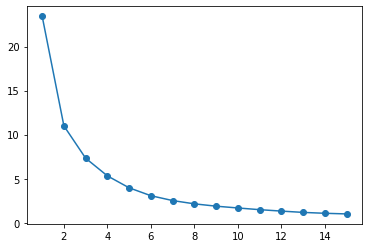

In [66]:
plt.plot(ks, costs, marker = 'o')

In [31]:
k.shape

(5, 1)

In [34]:
l = k.ravel()

In [36]:
l.shape

(5,)